##Import library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import  train_test_split
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

##Import Data

In [ ]:
print(tf.__version__)


2.3.0


In [ ]:
#Reference:
#/***************************************************************************************
#*    Title: <BME590_ML_Final_Project/BME590_Final_Project_keras.ipynb>
#*    Author: <Huisi Cai, Zhen Lin>
#*    Date: <2019>
#*    Code version: <N/A>
#*    Availability: <https://github.com/SylviaCHS/BME590_ML_Final_Project>
#*
#***************************************************************************************/


def read_feature(folder, num):
    filepath = glob.glob(os.path.join(folder, '*jpg'))
    img_arr = np.zeros([len(filepath), 40, 40, 3])
    label = num * np.ones(len(filepath), dtype="float32")
    for i, name in enumerate(filepath):
        img = Image.open(name)
        img_arr[i, :, :, :] = np.array(img, dtype="uint8")
    return img_arr, label

In [ ]:
import tensorflow as tf
pm_img_arr, pm_label = read_feature('/content/drive/My Drive/BME548L_final_project/plasmodium', 1)
non_pm_img_arr, non_pm_label = read_feature('/content/drive/My Drive/BME548L_final_project/Non-plasmodium_Image', 0)

(7097, 40, 40, 3)
(7097,)
Training data shape (6387, 40, 40, 3)
Training data shape (6387, 8)


numpy.ndarray

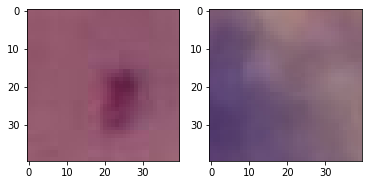

In [ ]:
images = np.concatenate((pm_img_arr, non_pm_img_arr))
labels = np.concatenate((pm_label, non_pm_label))

print(np.shape(images))
print(np.shape(labels))
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1)

X_train = X_train.astype(np.float32)/255
X_val = X_val.astype(np.float32)/255
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# change into one-hot vector
y_train = tf.keras.utils.to_categorical(y_train, 8) 
y_val = tf.keras.utils.to_categorical(y_val, 8)

# reshape dataset
X_train = X_train.reshape(X_train.shape[0], 40, 40, 3)
X_val = X_val.reshape(X_val.shape[0], 40, 40, 3)

X_train=np.array(X_train)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
print('Training data shape', y_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(40, 40, 3),cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(40, 40, 3),cmap=plt.cm.Greys);
type(X_train)
#print(X_train[i,:,:,:])

##Define CNN1

In [ ]:
def k_model (image_size):
 inputL = tf.keras.layers.Input(image_size)
 num_filter = 8
 x = inputL
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'tanh', padding = 'same')(x)
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'relu', padding = 'same')(x)  
 
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'tanh', padding = 'same')(x)
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'relu', padding = 'same')(x)

 
 x = tf.keras.layers.Dense(8, activation='softmax')(x)
 x = tf.keras.layers.Flatten()(x)
 out = tf.keras.layers.Dense(8, activation='softmax')(x)
 model = tf.keras.Model(inputs=inputL, outputs=out)
 return model

##Define model result accuracy plot

In [ ]:
def plot_loss_acc (history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  return


##Define Gaussian Noise 

In [ ]:

def add_noise(img, noise_sig):
  noise = tf.random.normal(shape = tf.shape(img), mean = 0.0, stddev = noise_sig,dtype = tf.float32)
  img += noise
  return img



##Optimize resolution of image
Resolution=40 with noise stddev = 0.02

6387


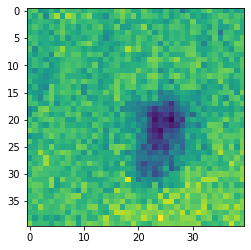

In [ ]:
print(X_train.shape[0])
import cv2
def image_resize(img, num):
  dim = (num,num)
  image =cv2.resize(img, dim,interpolation=cv2.INTER_AREA)
  rimage = cv2.resize(image, dim,interpolation=cv2.INTER_AREA)
  rimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #plt.imshow(rimage)
  return rimage


resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 40, 40, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 40, 40, 8)         608       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
dense_6 (Dense)              (None, 40, 40, 8)         72        
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)            

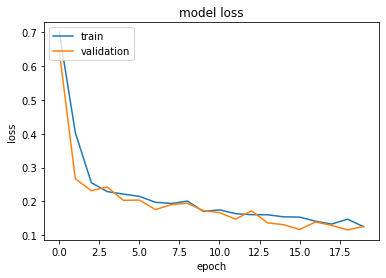

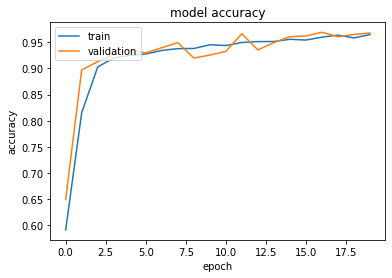

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
model.summary()
history1 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history1)

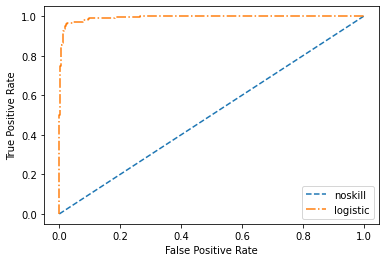

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=32 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 1s 15ms/step - loss: 0.7078 - acc: 0.5840 - val_loss: 0.6352 - val_acc: 0.6113
Epoch 2/20
50/50 [==============================] - 1s 11ms/step - loss: 0.4423 - acc: 0.7894 - val_loss: 0.2975 - val_acc: 0.8845
Epoch 3/20
50/50 [==============================] - 1s 11ms/step - loss: 0.2792 - acc: 0.8870 - val_loss: 0.2452 - val_acc: 0.9296
Epoch 4/20
50/50 [==============================] - 1s 10ms/step - loss: 0.2122 - acc: 0.9250 - val_loss: 0.1970 - val_acc: 0.9338
Epoch 5/20
50/50 [==============================] - 1s 11ms/step - loss: 0.1975 - acc: 0.9300 - val_loss: 0.1839 - val_acc: 0.9338
Epoch 6/20
50/50 [==============================] - 1s 11ms/step - loss: 0.1776 - acc: 0.9438 - val_loss: 0.1621 - val_acc: 0.9394
Epoch 7/20
50/50 [==============================] - 1s 11ms/step - loss: 0.1730 - acc: 0.9446 - val_loss: 0.2075 - val_acc: 0.9169
Epoch 8/20
50/50 [==============================] - 1s 11ms/step - loss: 0.1664 - a

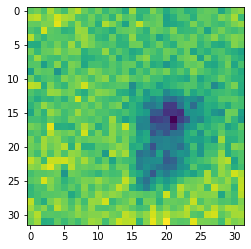

In [ ]:
resolution = 32
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')

history2 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


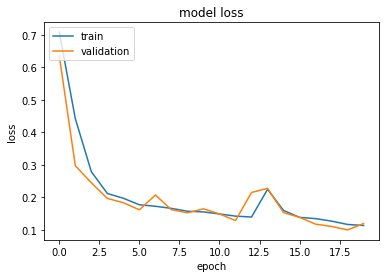

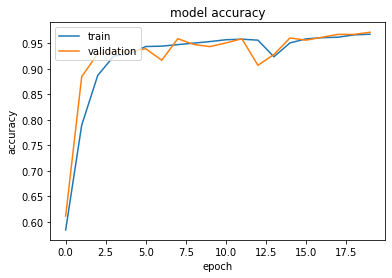

In [ ]:
plot_loss_acc(history2)

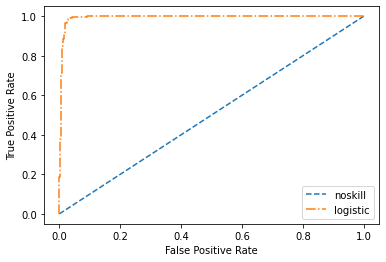

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=16 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 1s 10ms/step - loss: 0.7782 - acc: 0.5788 - val_loss: 0.6697 - val_acc: 0.6085
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6675 - acc: 0.6087 - val_loss: 0.6509 - val_acc: 0.6085
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.4325 - acc: 0.8138 - val_loss: 0.2536 - val_acc: 0.9070
Epoch 4/20
50/50 [==============================] - 0s 6ms/step - loss: 0.2297 - acc: 0.9212 - val_loss: 0.1892 - val_acc: 0.9296
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1848 - acc: 0.9369 - val_loss: 0.1521 - val_acc: 0.9479
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1496 - acc: 0.9524 - val_loss: 0.1410 - val_acc: 0.9479
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1221 - acc: 0.9604 - val_loss: 0.0991 - val_acc: 0.9704
Epoch 8/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1121 - acc: 0.9

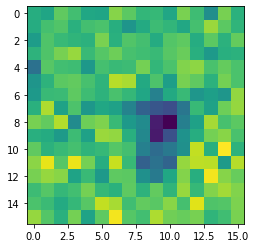

In [ ]:
resolution = 16
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
#model.summary()
history3 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


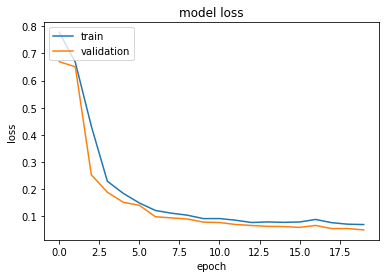

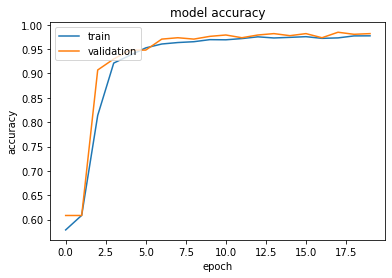

In [ ]:
plot_loss_acc(history3)

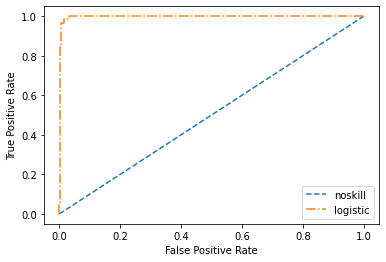

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=8 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 0s 8ms/step - loss: 1.0238 - acc: 0.5575 - val_loss: 0.6827 - val_acc: 0.6085
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6289 - acc: 0.6388 - val_loss: 0.5092 - val_acc: 0.7465
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.3294 - acc: 0.8885 - val_loss: 0.2677 - val_acc: 0.8972
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.2276 - acc: 0.9176 - val_loss: 0.2480 - val_acc: 0.9070
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.2001 - acc: 0.9286 - val_loss: 0.2064 - val_acc: 0.9239
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1763 - acc: 0.9393 - val_loss: 0.1951 - val_acc: 0.9310
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1684 - acc: 0.9435 - val_loss: 0.1809 - val_acc: 0.9338
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1530 - acc: 0.94

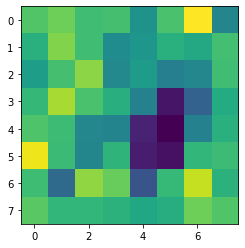

In [ ]:
resolution = 8
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
#model.summary()
history4 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


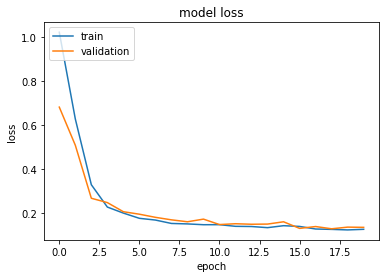

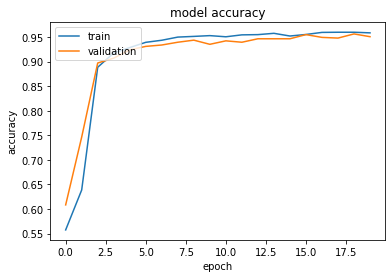

In [ ]:
plot_loss_acc(history4)

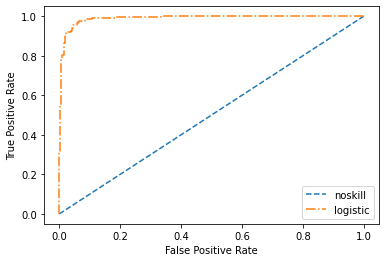

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=4 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 0s 8ms/step - loss: 1.4204 - acc: 0.5115 - val_loss: 0.8435 - val_acc: 0.6085
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7578 - acc: 0.6087 - val_loss: 0.7160 - val_acc: 0.6085
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.7037 - acc: 0.6087 - val_loss: 0.6934 - val_acc: 0.6085
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6886 - acc: 0.6087 - val_loss: 0.6839 - val_acc: 0.6085
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6818 - acc: 0.6087 - val_loss: 0.6815 - val_acc: 0.6085
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6763 - acc: 0.6087 - val_loss: 0.6698 - val_acc: 0.6085
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6499 - acc: 0.6134 - val_loss: 0.6046 - val_acc: 0.8113
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.5260 - acc: 0.78

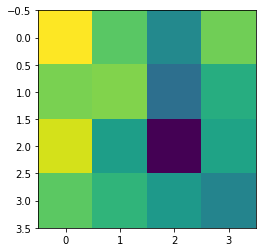

In [ ]:
resolution = 4
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
#model.summary()
history5 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


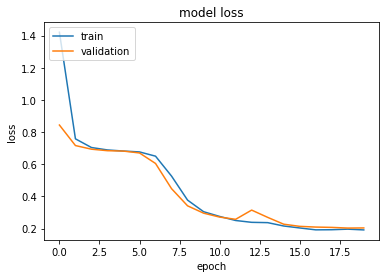

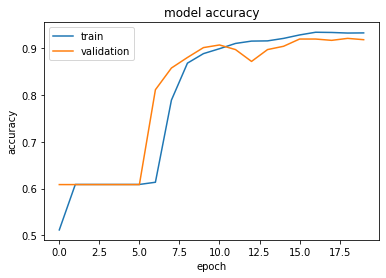

In [ ]:
plot_loss_acc(history5)

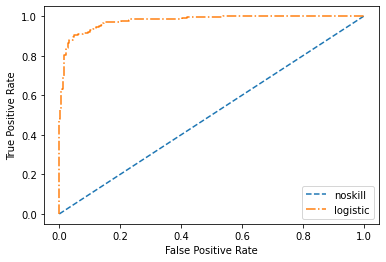

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=3 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 0s 8ms/step - loss: 1.5038 - acc: 0.3913 - val_loss: 1.0353 - val_acc: 0.3915
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.8921 - acc: 0.5884 - val_loss: 0.8052 - val_acc: 0.6085
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7711 - acc: 0.6087 - val_loss: 0.7454 - val_acc: 0.6085
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7312 - acc: 0.6087 - val_loss: 0.7192 - val_acc: 0.6085
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7118 - acc: 0.6087 - val_loss: 0.7053 - val_acc: 0.6085
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7008 - acc: 0.6087 - val_loss: 0.6969 - val_acc: 0.6085
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6942 - acc: 0.6087 - val_loss: 0.6915 - val_acc: 0.6085
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6897 - acc: 0.60

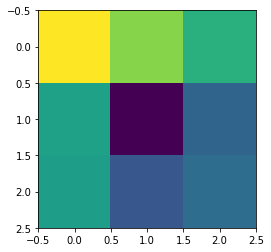

In [ ]:
resolution = 3
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
#model.summary()
history6 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


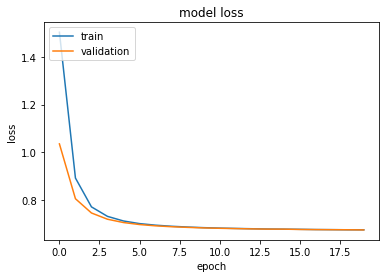

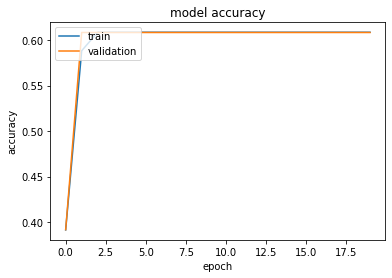

In [ ]:
plot_loss_acc(history6)

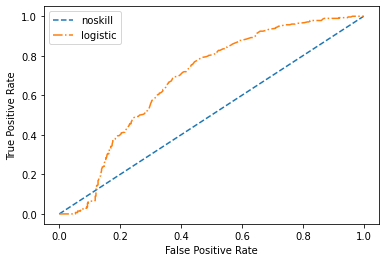

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Resolution=2 with noise stddev = 0.02

Epoch 1/20
50/50 [==============================] - 0s 9ms/step - loss: 1.9197 - acc: 0.4205 - val_loss: 1.6304 - val_acc: 0.6085
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 1.3465 - acc: 0.6087 - val_loss: 1.1452 - val_acc: 0.6085
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 1.0472 - acc: 0.6087 - val_loss: 0.9685 - val_acc: 0.6085
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.9201 - acc: 0.6087 - val_loss: 0.8776 - val_acc: 0.6085
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.8483 - acc: 0.6087 - val_loss: 0.8220 - val_acc: 0.6085
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.8031 - acc: 0.6087 - val_loss: 0.7860 - val_acc: 0.6085
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7734 - acc: 0.6087 - val_loss: 0.7618 - val_acc: 0.6085
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.7530 - acc: 0.60

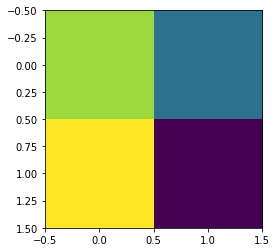

In [ ]:
resolution = 2
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
#model.summary()
history7 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


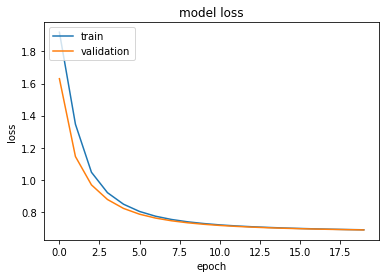

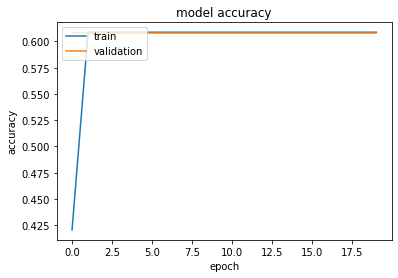

In [ ]:
plot_loss_acc(history7)

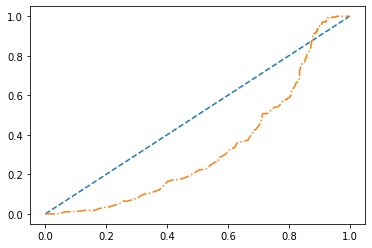

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')

##